In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


## Import required packages

In [2]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

## Load and Explore dataset

In [3]:
column_names = ['YearsExperience', 'Salary']
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv",header=1,names=column_names)

In [4]:
df.head()

,YearsExperience,Salary
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0


In [5]:
summary_stats = df.describe()
summary_stats

,YearsExperience,Salary
count,29.000000,29.000000
mean,5.558621,77268.137931
std,2.772250,26995.157605
min,1.400000,37732.000000
25%,3.300000,56958.000000
50%,5.000000,66030.000000
75%,8.000000,101303.000000
max,10.600000,122392.000000


## Scatter diagram (YearsExperience vs Salary)

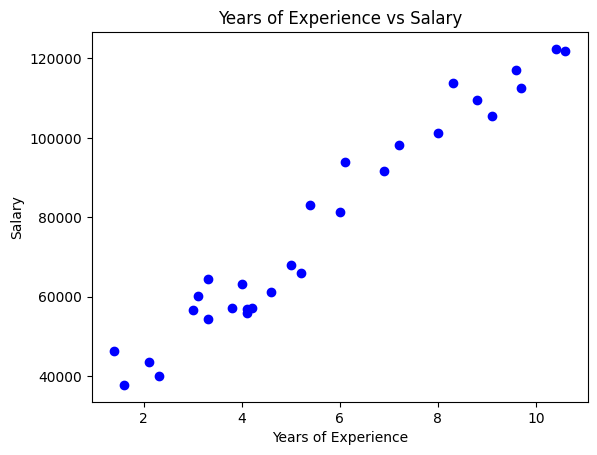

In [6]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Train/Fit model 

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.YearsExperience,df.Salary,train_size=0.8,random_state=42)

In [8]:
X_train = X_train.values.reshape(-1, 1)  # Ensure 2D format for X_train
X_test = X_test.values.reshape(-1, 1)    # Ensure 2D format for X_test

In [9]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [10]:
reg.coef_, reg.intercept_

(array([9296.54360763]), 25260.58237763067)

Regression fomula: <br>
Y = intercept + slope * input

In [11]:
reg.predict([[3.3]])

array([55939.17628281])

In [12]:
y = reg.intercept_ + reg.coef_ * 3.3

## Visualization of Fitted line

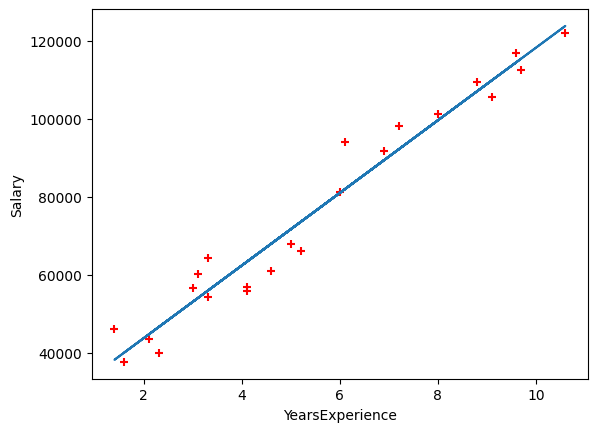

In [13]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(X_train,y_train,color="red", marker="+")
plt.plot(X_train,reg.predict(X_train))

## Evaluate the model performance

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = reg.predict(X_test)


In [16]:
mean_squared_error(y_pred,y_test.to_numpy())

42075990.17426761